# Import Library

In [22]:
import numpy as np
import pandas as pd
from itertools import product
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import random
import itertools
from tqdm import tqdm


# DATA LOAD

In [2]:
df = pd.read_csv("../data/for_simulation.csv")

In [9]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'day_of_week_name', 'month_year', 'day_month_year',
       'day_of_week_int', 'hour', 

# 시뮬레이션 1
- 리워드 금액, 구매 증가율을 신뢰도 기준에 따라 각기 달리 임의 설정

In [8]:

# 리워드 금액, 구매율 증가율, 신뢰도 상승 확률
reward_combinations = [
    {'High': 10, 'Mid': 5, 'Low': 3, 'Very Low': 0},
    {'High': 3, 'Mid': 2, 'Low': 1, 'Very Low': 0},
    {'High': 5, 'Mid': 3, 'Low': 2, 'Very Low': 0},
    
    
    
    {'High': 15, 'Mid': 10, 'Low': 5, 'Very Low': 0},
    {'High': 20, 'Mid': 15, 'Low': 10, 'Very Low': 5},
    {'High': 25, 'Mid': 20, 'Low': 15, 'Very Low': 5}
]

increase_rate_combinations = [
    {'High': 0.1, 'Mid': 0.1, 'Low': 0.1, 'Very Low': 0.1},
    {'High': 0.2, 'Mid': 0.2, 'Low': 0.2, 'Very Low': 0.2},
    {'High': 0.15, 'Mid': 0.15, 'Low': 0.15, 'Very Low': 0.15},

    {'High': 0.1, 'Mid': 0.05, 'Low': 0.02, 'Very Low': 0.0},
    {'High': 0.15, 'Mid': 0.1, 'Low': 0.05, 'Very Low': 0.02},
    {'High': 0.2, 'Mid': 0.15, 'Low': 0.1, 'Very Low': 0.02}
]

# trust_level_increase_combinations = [
#     {'Very Low': 0.2, 'Low': 0.1, 'Mid': 0.05, 'High': 0.0},
#     {'Very Low': 0.3, 'Low': 0.2, 'Mid': 0.1, 'High': 0.0},
#     {'Very Low': 0.4, 'Low': 0.3, 'Mid': 0.2, 'High': 0.0}
# ]

# 모든 조합 생성
# all_combinations = list(product(reward_combinations, increase_rate_combinations, trust_level_increase_combinations))

all_combinations = list(product(reward_combinations, increase_rate_combinations))
# 시뮬레이션 결과 저장
simulation_results = []

# 모든 조합에 대해 시뮬레이션 실행
# for reward_amounts, increase_rates, trust_level_increase_prob in all_combinations:

for reward_amounts, increase_rates in all_combinations:
    # Trust level별 초기 총 수익(판매 대금의 10%) 계산
    initial_revenues = {level: int(df[df['trust_level'] == level]['payment_value'].sum() * 0.1) for level in df['trust_level'].unique()}
    initial_trust_distribution = df['trust_level'].value_counts(normalize=True).to_dict()
    
    # 신뢰도 분포 업데이트
    updated_trust_distribution = initial_trust_distribution.copy()
    # for trust_level, prob in trust_level_increase_prob.items():
    #     if trust_level == 'High':
    #         continue  # High는 최고 등급이므로 변화 없음
        
    #     next_level = {
    #         'Very Low': 'Low',
    #         'Low': 'Mid',
    #         'Mid': 'High'
    #     }[trust_level]
        
    #     # 신뢰도 이동
    #     updated_trust_distribution[next_level] = updated_trust_distribution.get(next_level, 0) + updated_trust_distribution[trust_level] * prob
    #     updated_trust_distribution[trust_level] *= (1 - prob)
    
    # 초기 수익 및 시뮬레이션 계산
    initial_total_revenue = sum(initial_revenues.values())
    reward_provided_total = 0
    simulation_total_revenue = 0

    for trust_level, reward in reward_amounts.items():
        # 리워드 제공액 계산
        trust_level_count = len(df[df['trust_level'] == trust_level])
        reward_provided = reward * trust_level_count
        reward_provided_total += reward_provided
        
        # 구매 증가율에 따른 시뮬레이션 수익
        initial_revenue = initial_revenues.get(trust_level, 0)
        rate = increase_rates[trust_level]
        simulation_revenue = int(initial_revenue * (1 + rate))
        simulation_total_revenue += simulation_revenue
    
    # 시뮬레이션 순수익
    simulation_net_profit = simulation_total_revenue - reward_provided_total
    
    # 리워드 제공에 따른 추가 수익
    additional_revenue = simulation_net_profit - initial_total_revenue
    
    # 시뮬레이션 결과 저장
    simulation_results.append({
        'Reward Combination': reward_amounts,
        'Increase Rate Combination': increase_rates,
        # 'Trust Level Increase Probabilities': trust_level_increase_prob,
        # 'Initial Trust Distribution': initial_trust_distribution,
        # 'Updated Trust Distribution': updated_trust_distribution,
        'Initial Revenue': initial_total_revenue,
        'Simulation Revenue': simulation_total_revenue,
        'Reward Provided': reward_provided_total,
        'Simulation Net Profit': simulation_net_profit,
        'Additional Revenue': additional_revenue
    })

# 결과 DataFrame 생성
simulation_df1 = pd.DataFrame(simulation_results)

# 상위 10개의 시뮬레이션 결과 출력
print("다양한 시뮬레이션 결과:")

print(simulation_df1.nlargest(10, 'Simulation Net Profit'))


다양한 시뮬레이션 결과:
                                 Reward Combination  \
7    {'High': 3, 'Mid': 2, 'Low': 1, 'Very Low': 0}   
8    {'High': 3, 'Mid': 2, 'Low': 1, 'Very Low': 0}   
13   {'High': 5, 'Mid': 3, 'Low': 2, 'Very Low': 0}   
11   {'High': 3, 'Mid': 2, 'Low': 1, 'Very Low': 0}   
6    {'High': 3, 'Mid': 2, 'Low': 1, 'Very Low': 0}   
14   {'High': 5, 'Mid': 3, 'Low': 2, 'Very Low': 0}   
10   {'High': 3, 'Mid': 2, 'Low': 1, 'Very Low': 0}   
17   {'High': 5, 'Mid': 3, 'Low': 2, 'Very Low': 0}   
1   {'High': 10, 'Mid': 5, 'Low': 3, 'Very Low': 0}   
12   {'High': 5, 'Mid': 3, 'Low': 2, 'Very Low': 0}   

                            Increase Rate Combination  Initial Revenue  \
7   {'High': 0.2, 'Mid': 0.2, 'Low': 0.2, 'Very Lo...          1993048   
8   {'High': 0.15, 'Mid': 0.15, 'Low': 0.15, 'Very...          1993048   
13  {'High': 0.2, 'Mid': 0.2, 'Low': 0.2, 'Very Lo...          1993048   
11  {'High': 0.2, 'Mid': 0.15, 'Low': 0.1, 'Very L...          1993048   
6   {'High

# 시뮬레이션 2
- 리워드 신뢰도 기준으로 차등 지급
    리워드 3 < high< 15 , 2 < mid < int(round(high/2)), 1 < low < int(round(mid/2)), Very low = 0
- 구매 증가율은 전체로 보고 5% ~ 25% 고려

In [99]:
reward_combinations ,increase_rate_combinations = [], []

very_low_reward = 0  # 디폴트 0
reward_min = 3
reward_max = 10
for i in range(reward_min, reward_max+1):
    # 랜덤 리워드 금액 설정
    high_reward = i
    for j in range(2,int(round(i*2/3))+1):
        mid_reward = j
        for k in range(1,int(round(j*2/3))+1):
            low_reward = k
            reward_combinations.append({
                'High': high_reward,
                'Mid': mid_reward,
                'Low': low_reward,
                'Very Low': very_low_reward
            })
for i in range(5,26):
    increase_rate_combinations.append({'High': i * 0.01, 'Mid': i * 0.01, 'Low': i * 0.01, 'Very Low': i * 0.01})

# trust_level_increase_combinations = [
#     {'Very Low': 0.2, 'Low': 0.1, 'Mid': 0.05, 'High': 0.0},
#     {'Very Low': 0.3, 'Low': 0.2, 'Mid': 0.1, 'High': 0.0},
#     {'Very Low': 0.4, 'Low': 0.3, 'Mid': 0.2, 'High': 0.0}
# ]

# 모든 조합 생성
# all_combinations = list(product(reward_combinations, increase_rate_combinations, trust_level_increase_combinations))

all_combinations = list(product(reward_combinations, increase_rate_combinations))
# 시뮬레이션 결과 저장
simulation_results = []

# 모든 조합에 대해 시뮬레이션 실행
# for reward_amounts, increase_rates, trust_level_increase_prob in all_combinations:

for reward_amounts, increase_rates in all_combinations:
    # Trust level별 초기 총 수익(판매 대금의 10%) 계산
    initial_revenues = {level: int(df[df['trust_level'] == level]['payment_value'].sum() * 0.1) for level in df['trust_level'].unique()}
    initial_trust_distribution = df['trust_level'].value_counts(normalize=True).to_dict()
    
    # 신뢰도 분포 업데이트
    updated_trust_distribution = initial_trust_distribution.copy()
    # for trust_level, prob in trust_level_increase_prob.items():
    #     if trust_level == 'High':
    #         continue  # High는 최고 등급이므로 변화 없음
        
    #     next_level = {
    #         'Very Low': 'Low',
    #         'Low': 'Mid',
    #         'Mid': 'High'
    #     }[trust_level]
        
    #     # 신뢰도 이동
    #     updated_trust_distribution[next_level] = updated_trust_distribution.get(next_level, 0) + updated_trust_distribution[trust_level] * prob
    #     updated_trust_distribution[trust_level] *= (1 - prob)
    
    # 초기 수익 및 시뮬레이션 계산
    initial_total_revenue = sum(initial_revenues.values())
    reward_provided_total = 0
    simulation_total_revenue = 0

    for trust_level, reward in reward_amounts.items():
        # 리워드 제공액 계산
        trust_level_count = len(df[df['trust_level'] == trust_level])
        reward_provided = reward * trust_level_count
        reward_provided_total += reward_provided
        
        # 구매 증가율에 따른 시뮬레이션 수익
        initial_revenue = initial_revenues.get(trust_level, 0)
        rate = increase_rates[trust_level]
        simulation_revenue = int(initial_revenue * (1 + rate))
        simulation_total_revenue += simulation_revenue
    
    # 시뮬레이션 순수익
    simulation_net_profit = simulation_total_revenue - reward_provided_total
    
    # 리워드 제공에 따른 추가 수익
    additional_revenue = simulation_net_profit - initial_total_revenue
    
    # 시뮬레이션 결과 저장
    simulation_results.append({
        'Reward Combination': reward_amounts,
        'Increase Rate Combination': increase_rates,
        # 'Trust Level Increase Probabilities': trust_level_increase_prob,
        # 'Initial Trust Distribution': initial_trust_distribution,
        # 'Updated Trust Distribution': updated_trust_distribution,
        'Initial Revenue': initial_total_revenue,
        'Simulation Revenue': simulation_total_revenue,
        'Reward Provided': reward_provided_total,
        'Simulation Net Profit': simulation_net_profit,
        'Additional Revenue': additional_revenue
    })

# 결과 DataFrame 생성
simulation_df2 = pd.DataFrame(simulation_results)

# 상위 10개의 시뮬레이션 결과 출력
print("다양한 시뮬레이션 결과:")

print(simulation_df2.nlargest(10, 'Simulation Net Profit'))


다양한 시뮬레이션 결과:
                                  Reward Combination  \
20    {'High': 3, 'Mid': 2, 'Low': 1, 'Very Low': 0}   
41    {'High': 4, 'Mid': 2, 'Low': 1, 'Very Low': 0}   
104   {'High': 5, 'Mid': 2, 'Low': 1, 'Very Low': 0}   
167   {'High': 6, 'Mid': 2, 'Low': 1, 'Very Low': 0}   
293   {'High': 7, 'Mid': 2, 'Low': 1, 'Very Low': 0}   
482   {'High': 8, 'Mid': 2, 'Low': 1, 'Very Low': 0}   
671   {'High': 9, 'Mid': 2, 'Low': 1, 'Very Low': 0}   
944  {'High': 10, 'Mid': 2, 'Low': 1, 'Very Low': 0}   
19    {'High': 3, 'Mid': 2, 'Low': 1, 'Very Low': 0}   
40    {'High': 4, 'Mid': 2, 'Low': 1, 'Very Low': 0}   

                             Increase Rate Combination  Initial Revenue  \
20   {'High': 0.25, 'Mid': 0.25, 'Low': 0.25, 'Very...          1993048   
41   {'High': 0.25, 'Mid': 0.25, 'Low': 0.25, 'Very...          1993048   
104  {'High': 0.25, 'Mid': 0.25, 'Low': 0.25, 'Very...          1993048   
167  {'High': 0.25, 'Mid': 0.25, 'Low': 0.25, 'Very...          19930

In [100]:
simulation_df2.sort_values(by = ['Additional Revenue'], ascending=False)

,Reward Combination,Increase Rate Combination,Initial Revenue,Simulation Revenue,Reward Provided,Simulation Net Profit,Additional Revenue
20,"{'High': 3, 'Mid': 2, 'Low': 1, 'Very Low': 0}","{'High': 0.25, 'Mid': 0.25, 'Low': 0.25, 'Very...",1993048,2491308,186267,2305041,311993
41,"{'High': 4, 'Mid': 2, 'Low': 1, 'Very Low': 0}","{'High': 0.25, 'Mid': 0.25, 'Low': 0.25, 'Very...",1993048,2491308,188012,2303296,310248
104,"{'High': 5, 'Mid': 2, 'Low': 1, 'Very Low': 0}","{'High': 0.25, 'Mid': 0.25, 'Low': 0.25, 'Very...",1993048,2491308,189757,2301551,308503
167,"{'High': 6, 'Mid': 2, 'Low': 1, 'Very Low': 0}","{'High': 0.25, 'Mid': 0.25, 'Low': 0.25, 'Very...",1993048,2491308,191502,2299806,306758
293,"{'High': 7, 'Mid': 2, 'Low': 1, 'Very Low': 0}","{'High': 0.25, 'Mid': 0.25, 'Low': 0.25, 'Very...",1993048,2491308,193247,2298061,305013
...,...,...,...,...,...,...,...
1261,"{'High': 10, 'Mid': 7, 'Low': 4, 'Very Low': 0}","{'High': 0.06, 'Mid': 0.06, 'Low': 0.06, 'Very...",1993048,2112628,661871,1450757,-542291
1283,"{'High': 10, 'Mid': 7, 'Low': 5, 'Very Low': 0}","{'High': 0.07, 'Mid': 0.07, 'Low': 0.07, 'Very...",1993048,2132560,683489,1449071,-543977
1260,"{'High': 10, 'Mid': 7, 'Low': 4, 'Very Low': 0}","{'High': 0.05, 'Mid': 0.05, 'Low': 0.05, 'Very...",1993048,2092700,661871,1430829,-562219
1282,"{'High': 10, 'Mid': 7, 'Low': 5, 'Very Low': 0}","{'High': 0.06, 'Mid': 0.06, 'Low': 0.06, 'Very...",1993048,2112628,683489,1429139,-563909


In [110]:
a = simulation_df2.copy()

In [111]:
a['Increase Rate Combination'] = a['Increase Rate Combination'].apply(lambda x: list(set(x.values()))[0])
a['Reward Combination'] = a['Reward Combination'].apply(lambda x: str(x))
top_rewards_by_rate = {}
unique_rates = a['Increase Rate Combination'].unique()
reward_distribution = []
for rate in unique_rates:
    reward_distribution.extend(a[a['Increase Rate Combination'] == rate].nlargest(10, 'Simulation Net Profit')['Reward Combination'].tolist())
    


In [112]:
reward_distribution

["{'High': 3, 'Mid': 2, 'Low': 1, 'Very Low': 0}",
 "{'High': 4, 'Mid': 2, 'Low': 1, 'Very Low': 0}",
 "{'High': 5, 'Mid': 2, 'Low': 1, 'Very Low': 0}",
 "{'High': 6, 'Mid': 2, 'Low': 1, 'Very Low': 0}",
 "{'High': 7, 'Mid': 2, 'Low': 1, 'Very Low': 0}",
 "{'High': 8, 'Mid': 2, 'Low': 1, 'Very Low': 0}",
 "{'High': 9, 'Mid': 2, 'Low': 1, 'Very Low': 0}",
 "{'High': 10, 'Mid': 2, 'Low': 1, 'Very Low': 0}",
 "{'High': 4, 'Mid': 3, 'Low': 1, 'Very Low': 0}",
 "{'High': 5, 'Mid': 3, 'Low': 1, 'Very Low': 0}",
 "{'High': 3, 'Mid': 2, 'Low': 1, 'Very Low': 0}",
 "{'High': 4, 'Mid': 2, 'Low': 1, 'Very Low': 0}",
 "{'High': 5, 'Mid': 2, 'Low': 1, 'Very Low': 0}",
 "{'High': 6, 'Mid': 2, 'Low': 1, 'Very Low': 0}",
 "{'High': 7, 'Mid': 2, 'Low': 1, 'Very Low': 0}",
 "{'High': 8, 'Mid': 2, 'Low': 1, 'Very Low': 0}",
 "{'High': 9, 'Mid': 2, 'Low': 1, 'Very Low': 0}",
 "{'High': 10, 'Mid': 2, 'Low': 1, 'Very Low': 0}",
 "{'High': 4, 'Mid': 3, 'Low': 1, 'Very Low': 0}",
 "{'High': 5, 'Mid': 3, 'Low'

In [113]:
from collections import Counter

# 각 문자열 요소의 분포 계산
distribution = Counter(reward_distribution)
(
distribution)

Counter({"{'High': 3, 'Mid': 2, 'Low': 1, 'Very Low': 0}": 21,
         "{'High': 4, 'Mid': 2, 'Low': 1, 'Very Low': 0}": 21,
         "{'High': 5, 'Mid': 2, 'Low': 1, 'Very Low': 0}": 21,
         "{'High': 6, 'Mid': 2, 'Low': 1, 'Very Low': 0}": 21,
         "{'High': 7, 'Mid': 2, 'Low': 1, 'Very Low': 0}": 21,
         "{'High': 8, 'Mid': 2, 'Low': 1, 'Very Low': 0}": 21,
         "{'High': 9, 'Mid': 2, 'Low': 1, 'Very Low': 0}": 21,
         "{'High': 10, 'Mid': 2, 'Low': 1, 'Very Low': 0}": 21,
         "{'High': 4, 'Mid': 3, 'Low': 1, 'Very Low': 0}": 21,
         "{'High': 5, 'Mid': 3, 'Low': 1, 'Very Low': 0}": 21})

In [71]:
a['Increase Rate Combination'] = a['Increase Rate Combination'].apply(lambda x: list(set(x.values()))[0])
a['Reward Combination'] = a['Reward Combination'].apply(lambda x: tuple(sorted(x.items())))
top_rewards_by_rate = {}
unique_rates = a['Increase Rate Combination'].unique()


for rate in unique_rates:
    top_rewards = (
        simulation_df2[simulation_df2['Increase Rate Combination'] == rate]
        .nlargest(10, 'Simulation Net Profit')['Reward Combination']
    )
    top_rewards_by_rate[rate] = top_rewards.tolist()

# 각 Reward Combination의 빈도수 계산
reward_counts = simulation_df2['Reward Combination'].value_counts()

top_rewards_by_rate, reward_counts

({(('High', 0.05),
   ('Low', 0.05),
   ('Mid', 0.05),
   ('Very Low', 0.05)): [(('High', 3),
    ('Low', 1),
    ('Mid', 2),
    ('Very Low', 0)), (('High', 4),
    ('Low', 1),
    ('Mid', 2),
    ('Very Low', 0)), (('High', 5),
    ('Low', 1),
    ('Mid', 2),
    ('Very Low', 0)), (('High', 6),
    ('Low', 1),
    ('Mid', 2),
    ('Very Low', 0)), (('High', 7),
    ('Low', 1),
    ('Mid', 2),
    ('Very Low', 0)), (('High', 8),
    ('Low', 1),
    ('Mid', 2),
    ('Very Low', 0)), (('High', 9),
    ('Low', 1),
    ('Mid', 2),
    ('Very Low', 0)), (('High', 10),
    ('Low', 1),
    ('Mid', 2),
    ('Very Low', 0)), (('High', 4),
    ('Low', 1),
    ('Mid', 3),
    ('Very Low', 0)), (('High', 5), ('Low', 1), ('Mid', 3), ('Very Low', 0))],
  (('High', 0.06),
   ('Low', 0.06),
   ('Mid', 0.06),
   ('Very Low', 0.06)): [(('High', 3),
    ('Low', 1),
    ('Mid', 2),
    ('Very Low', 0)), (('High', 4),
    ('Low', 1),
    ('Mid', 2),
    ('Very Low', 0)), (('High', 5),
    ('Low', 1),
    

Expected Values (Means):
1951128.5545905707

Variances:
39488644150.73011

Standard Deviations:
198717.49835062365

95% Confidence Intervals:
Initial Revenue: nan ~ nan
Simulation Revenue: 2334530.27 ~ 2349128.81
Reward Provided: 384311.64 ~ 397090.33
Simulation Net Profit: 1941427.89 ~ 1960829.22
Additional Revenue: -51620.11 ~ -32218.78

T-Test between Simulation Revenue and Initial Revenue: t-stat=93.65, p-value=0.0000

Correlation Matrix:
                       Initial Revenue  Simulation Revenue  Reward Provided  \
Initial Revenue                    NaN                 NaN              NaN   
Simulation Revenue                 NaN        1.000000e+00     8.012643e-15   
Reward Provided                    NaN        8.012643e-15     1.000000e+00   
Simulation Net Profit              NaN        7.524498e-01    -6.586496e-01   
Additional Revenue                 NaN        7.524498e-01    -6.586496e-01   

                       Simulation Net Profit  Additional Revenue  
Initial Rev

c:\Python311\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2285: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\Python311\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2286: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
c:\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


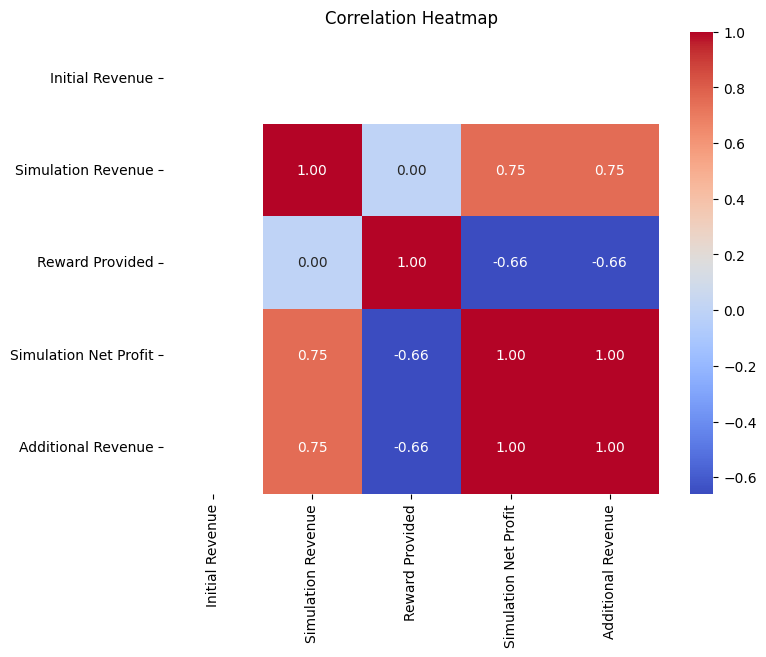

In [66]:
import numpy as np
import pandas as pd
from scipy.stats import norm, ttest_ind

# 1. 기댓값 (Expected Value)
expected_values = simulation_df2['Simulation Net Profit'].mean()
print("Expected Values (Means):")
print(expected_values)

# 2. 분산 및 표준편차
variances = simulation_df2['Simulation Net Profit'].var()
std_devs = simulation_df2['Simulation Net Profit'].std()
print("\nVariances:")
print(variances)
print("\nStandard Deviations:")
print(std_devs)

# 3. 신뢰 구간 (95% Confidence Interval)
confidence = 0.95
confidence_intervals = {}
for col in ['Initial Revenue', 'Simulation Revenue', 'Reward Provided', 'Simulation Net Profit', 'Additional Revenue']:
    mean = simulation_df2[col].mean()
    std_error = simulation_df2[col].std() / np.sqrt(len(simulation_df2))  # 표준 오차
    ci_lower, ci_upper = norm.interval(confidence, loc=mean, scale=std_error)
    confidence_intervals[col] = (ci_lower, ci_upper)
print("\n95% Confidence Intervals:")
for col, ci in confidence_intervals.items():
    print(f"{col}: {ci[0]:.2f} ~ {ci[1]:.2f}")

# 4. t-test (정책 효과 비교)
# 가정: Simulation Revenue와 Initial Revenue의 차이가 유의미한지 검정
t_stat, p_value = ttest_ind(simulation_df2['Simulation Revenue'], simulation_df2['Initial Revenue'], equal_var=False)
print(f"\nT-Test between Simulation Revenue and Initial Revenue: t-stat={t_stat:.2f}, p-value={p_value:.4f}")

# 5. 상관관계 분석
correlation_matrix = simulation_df2[['Initial Revenue', 'Simulation Revenue', 'Reward Provided', 'Simulation Net Profit', 'Additional Revenue']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# 시각화 (상관 분석 히트맵)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


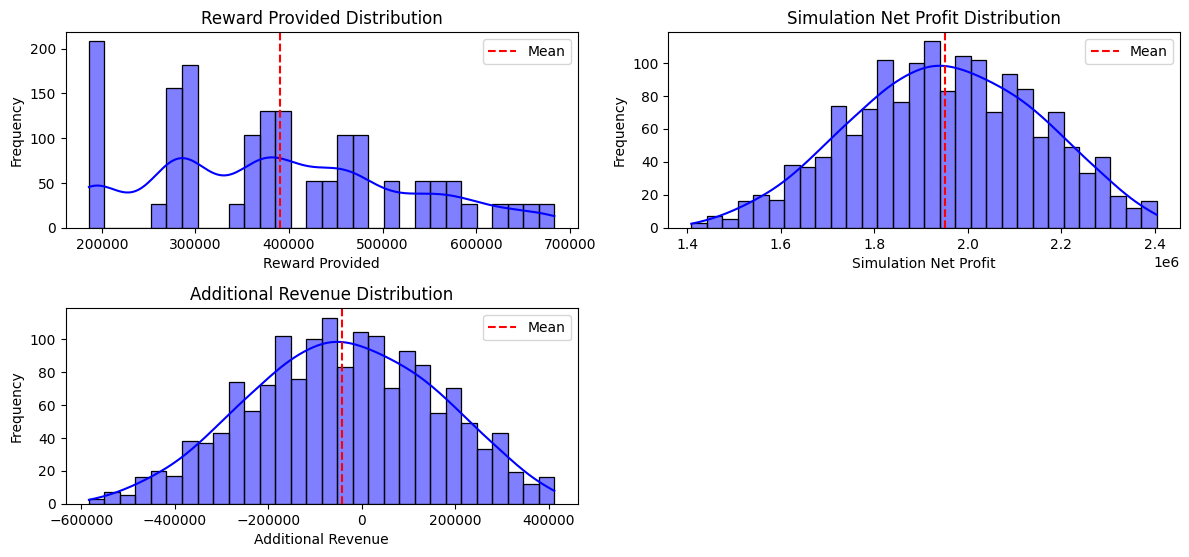

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# 분포를 확인할 주요 컬럼 리스트
columns_to_plot = [
    'Reward Provided', 
    'Simulation Net Profit', 
    'Additional Revenue'
]

# 분포 그래프 그리기
plt.figure(figsize=(12, 8))

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)  # 3행 2열 그래프 배치
    sns.histplot(simulation_df2[col], kde=True, bins=30, color='blue')
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.axvline(simulation_df2[col].mean(), color='red', linestyle='--', label='Mean')
    plt.legend()

plt.tight_layout()
plt.show()


## 시뮬레이션 분석

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind, norm


# 1. 기댓값 (Expected Value)
mean_net_profit = simulation_df2['Simulation Net Profit'].mean()
print(f"Simulation Net Profit Expected Value: {mean_net_profit:.2f} ₩")

# 2. 분산 및 표준편차
variance_net_profit = simulation_df2['Simulation Net Profit'].var()
std_dev_net_profit = simulation_df2['Simulation Net Profit'].std()
print(f"Variance: {variance_net_profit:.2f}, Standard Deviation: {std_dev_net_profit:.2f}")

# 3. 신뢰 구간 (95% Confidence Interval)
confidence = 0.95
mean = mean_net_profit
std_error = std_dev_net_profit / np.sqrt(len(simulation_df2))  # 표준 오차
ci_lower, ci_upper = norm.interval(confidence, loc=mean, scale=std_error)
print(f"95% Confidence Interval: {ci_lower:.2f} ~ {ci_upper:.2f}")

# 4. t-test (정책 효과 비교)
# 가정: High Reward > Mid Reward의 경우, 순수익이 더 높은지 확인
high_rewards = simulation_df['High Reward']
mid_rewards = simulation_df['Mid Reward']
t_stat, p_value = ttest_ind(high_rewards, mid_rewards, equal_var=False)
print(f"T-Test between High and Mid Rewards: t-stat={t_stat:.2f}, p-value={p_value:.4f}")

# 5. 상관관계 분석
correlation_matrix = simulation_df2[['Simulation Net Profit', 'Reward Provided (₩)', 'High Reward', 'Mid Reward', 'Low Reward']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# 시각화 (상관 분석 히트맵)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# 시뮬레이션 3
- 리워드 시뮬레이션 2에서 수익성이 가장 좋았던 리워드 채택 
    {'High': 7, 'Mid': 3, 'Low': 1, 'Very Low': 0}
- 구매 증가율 신뢰도 기준으로 다르게 상승한다는 전제

    High, Mid, Low, Very Low 조건
    
        - 각 값은 5% ~ 35% 사이.
        - 평균값은 10% ~ 25% 범위에 속함.

In [41]:
reward_combinations = [{'High': 7, 'Mid': 3, 'Low': 1, 'Very Low': 0}]
all_combinations = itertools.product(range(5, 36), repeat=4)

# 표준편차 값 재계산
for_std = [combination for combination in all_combinations if 0.1 <= sum(combination) / 4 * 0.01 <= 0.25]
all_values = [value for combination in for_std for value in combination]
std_dev = np.std(all_values)

all_combinations = itertools.product(range(5, 36), repeat=4)

increase_rate_combinations = [
    {'High': combination[0] * 0.01, 'Mid': combination[1] * 0.01, 'Low': combination[2] * 0.01, 'Very Low': combination[3] * 0.01}
    for combination in all_combinations
    if (0.1 <= sum(combination) / 4 * 0.01 <= 0.25) and (np.std(combination) < int(std_dev))
]

# trust_level_increase_combinations = [
#     {'Very Low': 0.2, 'Low': 0.1, 'Mid': 0.05, 'High': 0.0},
#     {'Very Low': 0.3, 'Low': 0.2, 'Mid': 0.1, 'High': 0.0},
#     {'Very Low': 0.4, 'Low': 0.3, 'Mid': 0.2, 'High': 0.0}
# ]

# 모든 조합 생성
# all_combinations = list(product(reward_combinations, increase_rate_combinations, trust_level_increase_combinations))

all_combinations = list(product(reward_combinations, increase_rate_combinations))
# 시뮬레이션 결과 저장
simulation_results = []

# 모든 조합에 대해 시뮬레이션 실행
# for reward_amounts, increase_rates, trust_level_increase_prob in all_combinations:

for reward_amounts, increase_rates in tqdm(all_combinations):
    # Trust level별 초기 총 수익(판매 대금의 10%) 계산
    initial_revenues = {level: int(df[df['trust_level'] == level]['payment_value'].sum() * 0.1) for level in df['trust_level'].unique()}
    initial_trust_distribution = df['trust_level'].value_counts(normalize=True).to_dict()
    
    # 신뢰도 분포 업데이트
    updated_trust_distribution = initial_trust_distribution.copy()
    # for trust_level, prob in trust_level_increase_prob.items():
    #     if trust_level == 'High':
    #         continue  # High는 최고 등급이므로 변화 없음
        
    #     next_level = {
    #         'Very Low': 'Low',
    #         'Low': 'Mid',
    #         'Mid': 'High'
    #     }[trust_level]
        
    #     # 신뢰도 이동
    #     updated_trust_distribution[next_level] = updated_trust_distribution.get(next_level, 0) + updated_trust_distribution[trust_level] * prob
    #     updated_trust_distribution[trust_level] *= (1 - prob)
    
    # 초기 수익 및 시뮬레이션 계산
    initial_total_revenue = sum(initial_revenues.values())
    reward_provided_total = 0
    simulation_total_revenue = 0

    for trust_level, reward in reward_amounts.items():
        # 리워드 제공액 계산
        trust_level_count = len(df[df['trust_level'] == trust_level])
        reward_provided = reward * trust_level_count
        reward_provided_total += reward_provided
        
        # 구매 증가율에 따른 시뮬레이션 수익
        initial_revenue = initial_revenues.get(trust_level, 0)
        rate = increase_rates[trust_level]
        simulation_revenue = int(initial_revenue * (1 + rate))
        simulation_total_revenue += simulation_revenue
    
    # 시뮬레이션 순수익
    simulation_net_profit = simulation_total_revenue - reward_provided_total
    
    # 리워드 제공에 따른 추가 수익
    additional_revenue = simulation_net_profit - initial_total_revenue
    average_rate = sum(increase_rates.values()) / 4
    # 시뮬레이션 결과 저장
    simulation_results.append({
        'Reward Combination': reward_amounts,
        'Increase Rate Combination': increase_rates,
        # 'Trust Level Increase Probabilities': trust_level_increase_prob,
        # 'Initial Trust Distribution': initial_trust_distribution,
        # 'Updated Trust Distribution': updated_trust_distribution,
        'Avg Increase Rate' : average_rate,
        'Initial Revenue': initial_total_revenue,
        'Simulation Revenue': simulation_total_revenue,
        'Reward Provided': reward_provided_total,
        'Simulation Net Profit': simulation_net_profit,
        'Additional Revenue': additional_revenue
    })

# 결과 DataFrame 생성
simulation_df3 = pd.DataFrame(simulation_results)

# 상위 10개의 시뮬레이션 결과 출력
print("다양한 시뮬레이션 결과:")

print(simulation_df3.nlargest(10, 'Simulation Net Profit'))


  0%|          | 444/426568 [03:46<60:27:12,  1.96it/s] 


KeyboardInterrupt: 

In [44]:
import itertools
import numpy as np
import pandas as pd
from tqdm import tqdm

# Reward combinations
reward_combinations = [{'High': 7, 'Mid': 3, 'Low': 1, 'Very Low': 0}]

# Generate all combinations for increase rates
all_combinations = list(itertools.product(range(5, 36), repeat=4))

# Calculate std_dev based on filtered combinations
filtered_combinations = [combination for combination in all_combinations if 0.1 <= sum(combination) / 4 * 0.01 <= 0.25]
std_dev = np.std(filtered_combinations)

# Filter combinations for increase rates
increase_rate_combinations = [
    {'High': combination[0] * 0.01, 'Mid': combination[1] * 0.01, 'Low': combination[2] * 0.01, 'Very Low': combination[3] * 0.01}
    for combination in filtered_combinations if np.std(combination) < std_dev
]

# Create combinations for simulation
sim_combinations = itertools.product(reward_combinations, increase_rate_combinations)

trust_level_counts = df['trust_level'].value_counts()
initial_revenues = df.groupby('trust_level')['payment_value'].sum() * 0.1
initial_total_revenue = initial_revenues.sum()

# Simulation
simulation_results = []

for reward_amounts, increase_rates in tqdm(sim_combinations, total=len(reward_combinations) * len(increase_rate_combinations)):
    # Calculate reward provided
    reward_provided_total = sum(
        reward_amounts[trust_level] * trust_level_counts.get(trust_level, 0)
        for trust_level in reward_amounts
    )

    # Calculate simulation revenue
    simulation_total_revenue = sum(
        initial_revenues.get(trust_level, 0) * (1 + increase_rates[trust_level])
        for trust_level in increase_rates
    )

    # Calculate simulation net profit and additional revenue
    simulation_net_profit = simulation_total_revenue - reward_provided_total
    additional_revenue = simulation_net_profit - initial_total_revenue
    average_rate = sum(increase_rates.values()) / len(increase_rates)

    # Log intermediate calculations
    simulation_results.append({
        'Reward Combination': reward_amounts,
        'Increase Rate Combination': increase_rates,
        'Initial Revenue': initial_total_revenue,  # Fixed
        'Simulation Revenue': simulation_total_revenue,
        'Reward Provided': reward_provided_total,
        'Simulation Net Profit': simulation_net_profit,
        'Additional Revenue': additional_revenue,
        'Avg Increase Rate': average_rate
    })

# Convert results to DataFrame
simulation_df = pd.DataFrame(simulation_results)

# Display top 10 results
top_results = simulation_df.nlargest(10, 'Simulation Net Profit')
print(top_results)

100%|██████████| 513566/513566 [00:39<00:00, 12931.93it/s]


                                    Reward Combination  \
124358  {'High': 7, 'Mid': 3, 'Low': 1, 'Very Low': 0}   
145697  {'High': 7, 'Mid': 3, 'Low': 1, 'Very Low': 0}   
124356  {'High': 7, 'Mid': 3, 'Low': 1, 'Very Low': 0}   
145696  {'High': 7, 'Mid': 3, 'Low': 1, 'Very Low': 0}   
124357  {'High': 7, 'Mid': 3, 'Low': 1, 'Very Low': 0}   
167572  {'High': 7, 'Mid': 3, 'Low': 1, 'Very Low': 0}   
189816  {'High': 7, 'Mid': 3, 'Low': 1, 'Very Low': 0}   
124352  {'High': 7, 'Mid': 3, 'Low': 1, 'Very Low': 0}   
145692  {'High': 7, 'Mid': 3, 'Low': 1, 'Very Low': 0}   
124355  {'High': 7, 'Mid': 3, 'Low': 1, 'Very Low': 0}   

                                Increase Rate Combination  Initial Revenue  \
124358  {'High': 0.12, 'Mid': 0.35000000000000003, 'Lo...      1993049.256   
145697  {'High': 0.13, 'Mid': 0.35000000000000003, 'Lo...      1993049.256   
124356  {'High': 0.12, 'Mid': 0.35000000000000003, 'Lo...      1993049.256   
145696  {'High': 0.13, 'Mid': 0.35000000000000003

In [49]:
simulation_df.sort_values(by=["Additional Revenue"],ascending=False)

,Reward Combination,Increase Rate Combination,Initial Revenue,Simulation Revenue,Reward Provided,Simulation Net Profit,Additional Revenue,Avg Increase Rate
124358,"{'High': 7, 'Mid': 3, 'Low': 1, 'Very Low': 0}","{'High': 0.12, 'Mid': 0.35000000000000003, 'Lo...",1993049.256,2.633578e+06,272954,2.360624e+06,367575.22649,0.2500
145697,"{'High': 7, 'Mid': 3, 'Low': 1, 'Very Low': 0}","{'High': 0.13, 'Mid': 0.35000000000000003, 'Lo...",1993049.256,2.633224e+06,272954,2.360270e+06,367220.60152,0.2500
124356,"{'High': 7, 'Mid': 3, 'Low': 1, 'Very Low': 0}","{'High': 0.12, 'Mid': 0.35000000000000003, 'Lo...",1993049.256,2.631832e+06,272954,2.358878e+06,365828.62308,0.2500
145696,"{'High': 7, 'Mid': 3, 'Low': 1, 'Very Low': 0}","{'High': 0.13, 'Mid': 0.35000000000000003, 'Lo...",1993049.256,2.631477e+06,272954,2.358523e+06,365473.99811,0.2500
124357,"{'High': 7, 'Mid': 3, 'Low': 1, 'Very Low': 0}","{'High': 0.12, 'Mid': 0.35000000000000003, 'Lo...",1993049.256,2.631163e+06,272954,2.358209e+06,365159.39527,0.2475
...,...,...,...,...,...,...,...,...
385392,"{'High': 7, 'Mid': 3, 'Low': 1, 'Very Low': 0}","{'High': 0.25, 'Mid': 0.05, 'Low': 0.06, 'Very...",1993049.256,2.103156e+06,272954,1.830202e+06,-162847.04577,0.1025
365393,"{'High': 7, 'Mid': 3, 'Low': 1, 'Very Low': 0}","{'High': 0.24, 'Mid': 0.05, 'Low': 0.06, 'Very...",1993049.256,2.102842e+06,272954,1.829888e+06,-163161.64861,0.1000
385379,"{'High': 7, 'Mid': 3, 'Low': 1, 'Very Low': 0}","{'High': 0.25, 'Mid': 0.05, 'Low': 0.05, 'Very...",1993049.256,2.101410e+06,272954,1.828456e+06,-164593.64918,0.1025
365378,"{'High': 7, 'Mid': 3, 'Low': 1, 'Very Low': 0}","{'High': 0.24, 'Mid': 0.05, 'Low': 0.05, 'Very...",1993049.256,2.101095e+06,272954,1.828141e+06,-164908.25202,0.1000


# 추가 수익에 따른 시뮬레이션 결과 나열

In [67]:
# 예시 데이터 (사용자의 simulation_df 대신 값 입력)
data = [    'Initial Revenue',
    'Simulation Revenue',
    'Reward Provided',
    'Simulation Net Profit',
    'Additional Revenue']
# 데이터프레임 생성
simulation_analysis = simulation_df[data]

c:\Python311\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2285: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\Python311\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2286: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


Analysis for Initial Revenue:
  Mean: 1993048.00
  Standard Deviation: 0.00
  95% Confidence Interval: nan ~ nan
Analysis for Simulation Revenue:
  Mean: 2223477.17
  Standard Deviation: 103734.01
  95% Confidence Interval: 2020162.24 ~ 2426792.09
Analysis for Reward Provided:
  Mean: 903940.50
  Standard Deviation: 679473.68
  95% Confidence Interval: -427803.44 ~ 2235684.44
Analysis for Simulation Net Profit:
  Mean: 1319536.67
  Standard Deviation: 687346.51
  95% Confidence Interval: -27637.74 ~ 2666711.08
Analysis for Additional Revenue:
  Mean: -673511.33
  Standard Deviation: 687346.51
  95% Confidence Interval: -2020685.74 ~ 673663.08


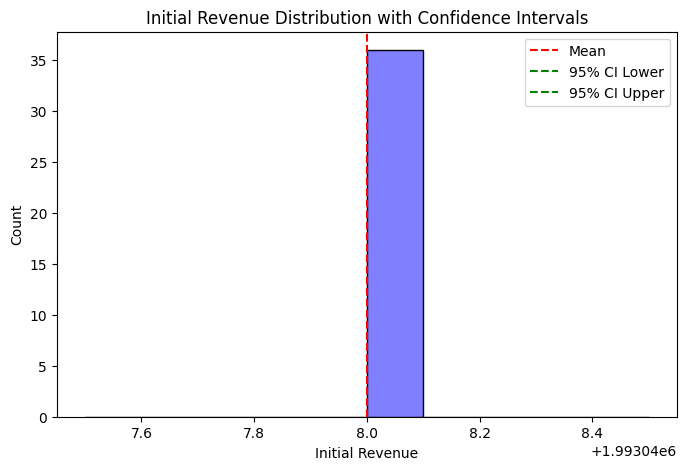

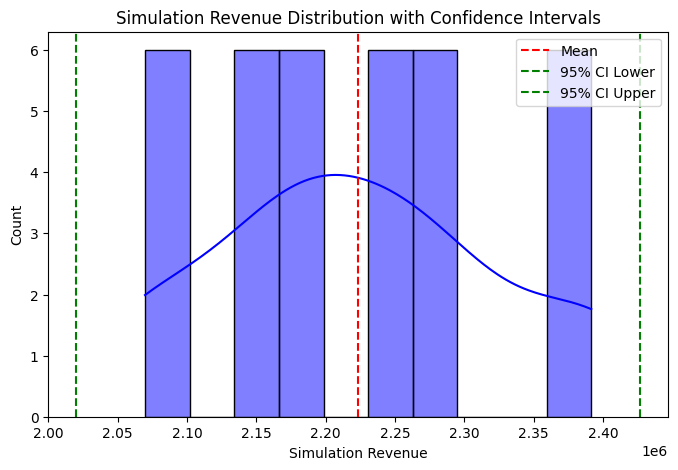

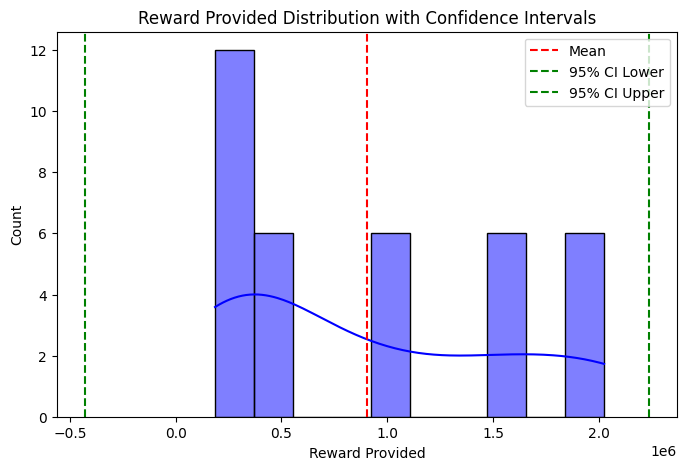

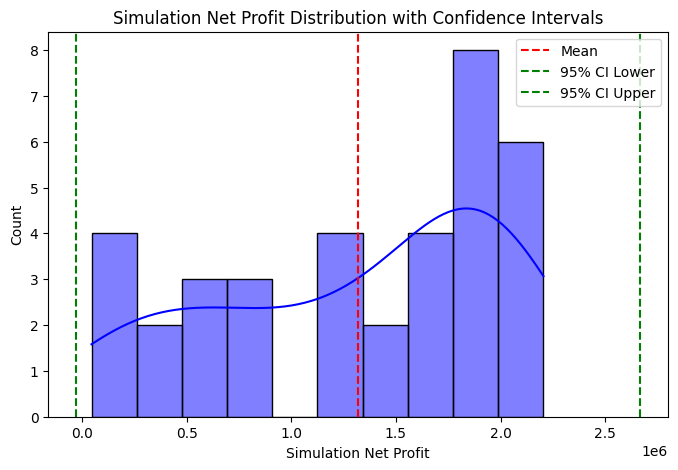

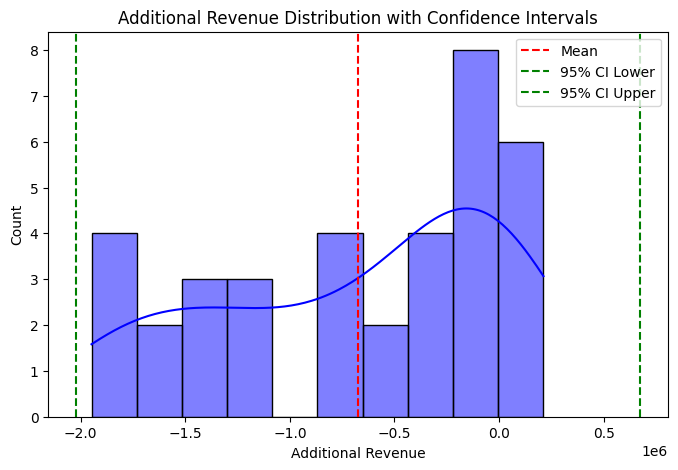

In [68]:
# 분포 분석 함수
def analyze_distribution(column, confidence=0.95):
    """
    분포 분석 및 신뢰 구간 계산
    Args:
        column (pd.Series): 분석 대상 컬럼
        confidence (float): 신뢰 구간 (기본값 95%)
    Returns:
        dict: 평균, 표준편차, 신뢰 구간 (하한, 상한)
    """
    mean = column.mean()
    std = column.std()
    ci = stats.norm.interval(confidence, loc=mean, scale=std)
    return {
        'Mean': mean,
        'Standard Deviation': std,
        f'{int(confidence * 100)}% Confidence Interval': ci
    }

# 각 지표에 대해 분포 분석 수행
results = {}
for col in simulation_analysis.columns:
    results[col] = analyze_distribution(simulation_analysis[col], confidence=0.95)

# 분석 결과 출력
for col, res in results.items():
    print(f"Analysis for {col}:")
    for key, value in res.items():
        if isinstance(value, tuple):
            print(f"  {key}: {value[0]:.2f} ~ {value[1]:.2f}")
        else:
            print(f"  {key}: {value:.2f}")

# 그래프 시각화 (분포와 신뢰 구간)
for col in simulation_analysis.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(simulation_analysis[col], kde=True, bins=10, color="blue")
    plt.axvline(results[col]['Mean'], color='red', linestyle='--', label='Mean')
    plt.axvline(results[col]['95% Confidence Interval'][0], color='green', linestyle='--', label='95% CI Lower')
    plt.axvline(results[col]['95% Confidence Interval'][1], color='green', linestyle='--', label='95% CI Upper')
    plt.title(f"{col} Distribution with Confidence Intervals")
    plt.legend()
    plt.show()


추가 수익 평균: -673511.3333333334
추가 수익 표준편차: 677732.8011599081
80% 확률 범위: -1541009.32 ~ 193986.65


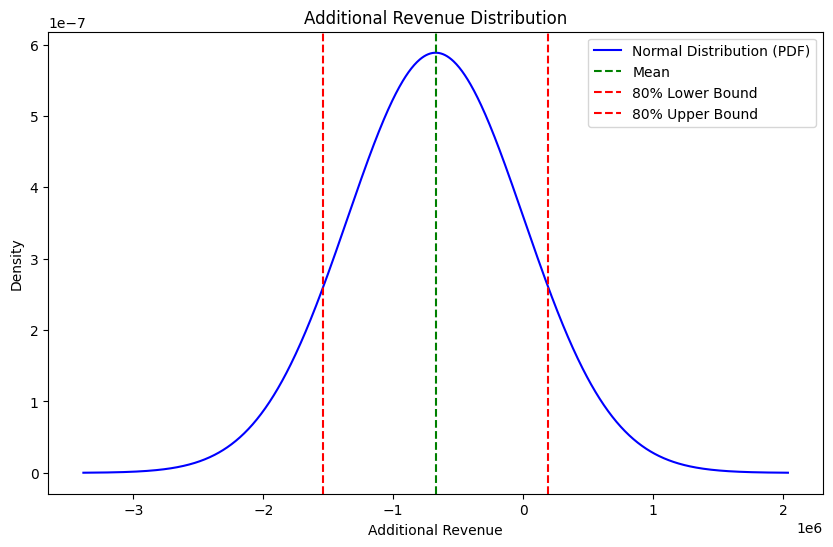

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, poisson

# 데이터 (추정치 기반)
additional_revenue = simulation_df['Additional Revenue'].values
mean_revenue = additional_revenue.mean()
std_revenue = additional_revenue.std()

# 정규분포 계산
x = np.linspace(mean_revenue - 4*std_revenue, mean_revenue + 4*std_revenue, 1000)
pdf = norm.pdf(x, mean_revenue, std_revenue)

# 80% 범위 계산 (정규분포)
low_bound = mean_revenue - 1.28 * std_revenue
high_bound = mean_revenue + 1.28 * std_revenue

# 결과 출력
print("추가 수익 평균:", mean_revenue)
print("추가 수익 표준편차:", std_revenue)
print(f"80% 확률 범위: {low_bound:.2f} ~ {high_bound:.2f}")

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='Normal Distribution (PDF)', color='blue')
plt.axvline(mean_revenue, color='green', linestyle='--', label='Mean')
plt.axvline(low_bound, color='red', linestyle='--', label='80% Lower Bound')
plt.axvline(high_bound, color='red', linestyle='--', label='80% Upper Bound')
plt.title("Additional Revenue Distribution")
plt.xlabel("Additional Revenue")
plt.ylabel("Density")
plt.legend()
plt.show()

In [70]:
import numpy as np
import pandas as pd
import scipy.stats as stats

# 예시 데이터 생성
np.random.seed(42)
data = {
    'customer_id': np.random.randint(1000, 2000, 100),
    'payment_value': np.random.uniform(20, 200, 100),
    'trust_level': np.random.choice(['High', 'Mid', 'Low', 'Very Low'], 100)
}
df = pd.DataFrame(data)

# 리워드 및 증가율 변수 확대
reward_combinations = list(product(
    [10, 15, 20, 25],  # High
    [5, 10, 15, 20],   # Mid
    [2, 5, 10, 15],    # Low
    [0, 2, 5]          # Very Low
))
increase_rate_combinations = list(product(
    [0.05, 0.1, 0.15, 0.2],  # High
    [0.02, 0.05, 0.1, 0.15],  # Mid
    [0.01, 0.02, 0.05, 0.1],  # Low
    [0.0, 0.01, 0.02]         # Very Low
))

# 상위 조합 선별 후 수천 번의 시뮬레이션 실행
selected_combinations = [{'High': 15, 'Mid': 10, 'Low': 5, 'Very Low': 0},
                         {'High': 20, 'Mid': 15, 'Low': 10, 'Very Low': 5}]

results = []
for combo in selected_combinations:
    profits = []
    for _ in range(1000):  # 수천 번 반복
        revenue = sum(df['payment_value'] * 0.1 * (1 + np.random.uniform(0, 0.1)))
        reward_cost = sum([combo[level] * len(df[df['trust_level'] == level]) for level in combo])
        net_profit = revenue - reward_cost
        profits.append(net_profit)
    mean_profit = np.mean(profits)
    std_profit = np.std(profits)
    ci_lower, ci_upper = stats.norm.interval(0.95, loc=mean_profit, scale=std_profit)
    results.append({
        'Reward Combo': combo,
        'Mean Profit': mean_profit,
        '95% CI Lower': ci_lower,
        '95% CI Upper': ci_upper
    })

# 결과 출력
results_df = pd.DataFrame(results)
print(results_df)


                                        Reward Combo  Mean Profit  \
0   {'High': 15, 'Mid': 10, 'Low': 5, 'Very Low': 0}   524.372933   
1  {'High': 20, 'Mid': 15, 'Low': 10, 'Very Low': 5}    23.036847   

   95% CI Lower  95% CI Upper  
0    464.203755    584.542111  
1    -36.692701     82.766396  
